/home/ktisanic/anaconda3/lib/python3.5/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


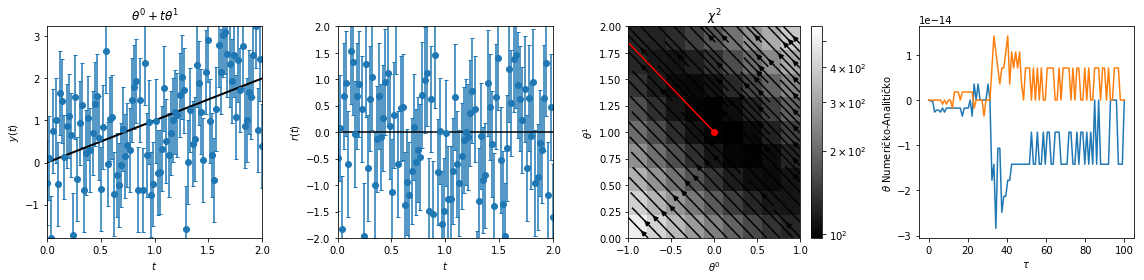

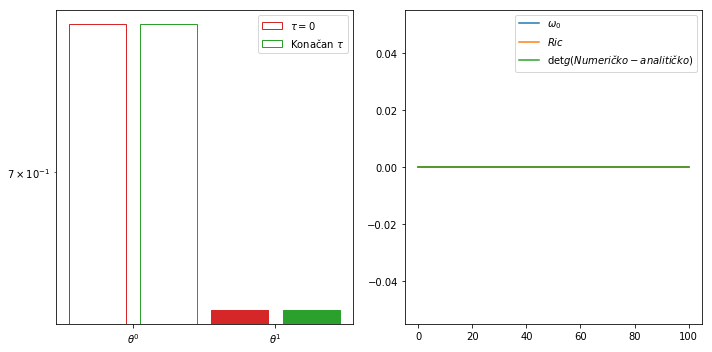

In [2]:
%run "MBAM_codes.py"
class model(MBAM_plotting):
    def __init__(self,*args,**kwargs):
        MBAM_plotting.__init__(self,self._model,'Linearan/linearan',*args,**kwargs)
        self._title = r'$\theta^0+t\theta^1$'
    def _model(self,T,θ):
        x1,x2=θ
        return x2*T+x1
    def analitic(self,θ,x,σ,τ):
        g = np.array([[np.sum(1/σ**2),np.sum(x/σ**2)],
                      [np.sum(x/σ**2),np.sum(x**2/σ**2)]])
        λ, v = np.linalg.eigh(g)
        v = v[:,0]
        sc = solution_class(g=g,λ0=λ[0],θ=np.array([v[0]*τ+θ[0],v[1]*τ+θ[1]]),detg=np.linalg.det(g))
        sc.strip()
        sc.array()
        return sc
N_D = 100
σ   = 1
bf  = np.array([0.,1.])
X   = np.linspace(0,2,N_D)
Y   = np.random.normal(0,σ,N_D)+model._model(model,X,bf)

MPL = model(X,Y,Y/Y,bf,xlim=[-1,1],ylim=[0,2])

θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(10,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0]])
MPL.MBAM   = MPL.run_MBAM(bf,k=0,T=np.linspace(0,100,100))
MPL.MBAM_a = MPL.analitic(MPL.θ_bf,MPL.t,MPL.σ,MPL.MBAM.τ)

f,ax = plt.subplots(1,4,figsize=(4*4,4))
MPL.plot_data(ax[:2])
MPL.plot_scalar(ax[2],X,Y, ALL[:,:,0], ALL[:,:,1], ALL[:,:,2])
ax[0].set_title(MPL._title)
ax[2].plot(MPL.MBAM.θ[:,0],MPL.MBAM.θ[:,1],'r')
ax[2].set_title('$\chi^2$')
ax[3].plot(MPL.MBAM.τ,MPL.MBAM.θ-MPL.MBAM_a.θ.T)
ax[3].set_ylabel(r'$\theta$ Numeričko-Analitičko ')
ax[3].set_xlabel(r'$\tau$')
f.tight_layout()
f.savefig(MPL.NAME+'_model.pdf')

f,axs = plt.subplots(1,2,figsize=(10,5))
MPL.bar_plot(axs[0],np.linalg.eigh(MPL.g(MPL.MBAM.θ[0]))[1][0,:],
             np.linalg.eigh(MPL.g(MPL.MBAM.θ[-1]))[1][0,:],colors=['C3','C2'],
             labels=[r"$\tau=0$",r"Konačan $\tau$"])
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.ω0,label='$\omega_0$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.R,label='$Ric$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.detg-MPL.MBAM_a.detg,label='$\det g (Numeričko-analitičko)$')
axs[1].legend()
f.tight_layout()
f.savefig(MPL.NAME+'_barplot.pdf')